In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [7]:
import os
import torch
from torchvision import datasets
from PIL import ImageFile
from glob import glob
import torchvision.transforms as transforms

ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

min_resize = 224
min_crop = 224
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])

input_dir = 'dogImages'
train_dir = 'train'
test_dir = 'test'
valid_dir = 'valid'

#transform
train_tf = transforms.Compose([transforms.Resize(min_resize),
                                       transforms.CenterCrop(min_crop),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomVerticalFlip(),
                                       transforms.RandomRotation(2020),
                                       transforms.ToTensor(),
                                       normalize])

test_tf = transforms.Compose([transforms.Resize(min_resize),
                                       transforms.CenterCrop(min_crop),
                                       transforms.ToTensor(),
                                       normalize])

valid_tf = test_tf = transforms.Compose([transforms.Resize(min_resize),
                                       transforms.CenterCrop(min_crop),
                                       transforms.ToTensor(),
                                       normalize])

#load datasets
train_dt = datasets.ImageFolder(input_dir + '/' + train_dir, transform=train_tf)
test_dt = datasets.ImageFolder(input_dir + '/' + test_dir, transform=test_tf)
valid_dt = datasets.ImageFolder(input_dir + '/' + valid_dir, transform=valid_tf)

print("Train data: {} images loaded".format(len(train_dt)))
print("Test data: {} images loaded".format(len(test_dt)))
print("Valid data: {} images loaded".format(len(valid_dt)))

loaders_scratch = {}
loaders_scratch[train_dir] = torch.utils.data.DataLoader(train_dt, batch_size=32, shuffle=True)
loaders_scratch[test_dir] = torch.utils.data.DataLoader(test_dt, batch_size=32)
loaders_scratch[valid_dir] = torch.utils.data.DataLoader(valid_dt, batch_size=32)

print("Total categories: {}".format(len(train_dt.classes)))
print(train_dt.classes)

Train data: 6680 images loaded
Test data: 836 images loaded
Valid data: 835 images loaded
Total categories: 133
['001.Affenpinscher', '002.Afghan_hound', '003.Airedale_terrier', '004.Akita', '005.Alaskan_malamute', '006.American_eskimo_dog', '007.American_foxhound', '008.American_staffordshire_terrier', '009.American_water_spaniel', '010.Anatolian_shepherd_dog', '011.Australian_cattle_dog', '012.Australian_shepherd', '013.Australian_terrier', '014.Basenji', '015.Basset_hound', '016.Beagle', '017.Bearded_collie', '018.Beauceron', '019.Bedlington_terrier', '020.Belgian_malinois', '021.Belgian_sheepdog', '022.Belgian_tervuren', '023.Bernese_mountain_dog', '024.Bichon_frise', '025.Black_and_tan_coonhound', '026.Black_russian_terrier', '027.Bloodhound', '028.Bluetick_coonhound', '029.Border_collie', '030.Border_terrier', '031.Borzoi', '032.Boston_terrier', '033.Bouvier_des_flandres', '034.Boxer', '035.Boykin_spaniel', '036.Briard', '037.Brittany', '038.Brussels_griffon', '039.Bull_terrier',

In [68]:
print(loaders_scratch['test'])
for batch_idx, (data, target) in enumerate(loaders_scratch['test']):
    print(data)
    print(target)

tensor([[[[ 2.1462,  2.1290,  2.0948,  ...,  2.0948,  2.1290,  2.1290],
          [ 2.1633,  2.1975,  2.1804,  ...,  2.1633,  2.1462,  2.0777],
          [ 2.2147,  2.1975,  2.1633,  ...,  2.1462,  2.1290,  2.0605],
          ...,
          [ 2.0777,  2.0777,  2.1290,  ..., -1.2445, -1.2445, -0.6794],
          [ 1.9407,  2.0263,  2.1119,  ..., -1.4158, -1.4329, -1.1418],
          [ 1.8893,  1.9920,  2.1290,  ..., -1.6555, -1.6384, -1.3644]],

         [[ 2.2885,  2.2885,  2.2885,  ...,  2.0784,  2.1310,  2.1485],
          [ 2.3410,  2.3761,  2.3761,  ...,  2.0959,  2.0784,  2.0259],
          [ 2.4111,  2.3936,  2.3936,  ...,  2.0434,  2.0434,  1.9909],
          ...,
          [ 1.5007,  1.5532,  1.6232,  ..., -1.4930, -1.4930, -0.9153],
          [ 1.3081,  1.4307,  1.5532,  ..., -1.6155, -1.6331, -1.3354],
          [ 1.2031,  1.3606,  1.5182,  ..., -1.7906, -1.7731, -1.4930]],

         [[ 2.0997,  2.0474,  1.9777,  ...,  1.4374,  1.4897,  1.5071],
          [ 2.1171,  2.0997,  

        3, 3, 3, 3, 3, 3, 4, 4])
tensor([[[[-1.0390, -1.1075, -0.9877,  ..., -0.0972,  0.0056,  0.1426],
          [-1.0219, -0.9363, -0.9363,  ...,  0.0741,  0.0741,  0.0741],
          [-1.0048, -0.9363, -0.9534,  ...,  0.0741,  0.0398,  0.0912],
          ...,
          [-0.3027, -0.6794, -0.3883,  ..., -0.0458, -0.5253, -0.4054],
          [-0.5596, -0.5424, -0.3198,  ..., -0.0629, -0.3027,  0.1083],
          [-0.3198, -0.1486, -0.4054,  ..., -0.2342, -0.2856,  0.0912]],

         [[-0.6352, -0.6877, -0.6527,  ...,  0.4328,  0.6429,  0.6954],
          [-0.6527, -0.6352, -0.6001,  ...,  0.6779,  0.7129,  0.6779],
          [-0.6702, -0.6702, -0.6176,  ...,  0.6429,  0.5903,  0.6779],
          ...,
          [ 0.1001, -0.5651,  0.1001,  ...,  0.3803, -0.0749, -0.0924],
          [-0.1975, -0.3025,  0.2227,  ...,  0.4328,  0.1001,  0.2752],
          [-0.0574,  0.2052,  0.0826,  ...,  0.2402, -0.0049,  0.2052]],

         [[-0.2358, -0.2707, -0.2358,  ..., -0.6541, -0.6541, -0.3753

        7, 7, 7, 7, 7, 7, 7, 8])
tensor([[[[ 1.9235,  1.9578,  1.9235,  ...,  1.9920,  1.9920,  2.0092],
          [ 1.9407,  1.9407,  1.9064,  ...,  1.9407,  1.9235,  1.9407],
          [ 1.9578,  1.9578,  1.9064,  ...,  1.9578,  1.9407,  1.9578],
          ...,
          [ 1.4440,  1.2557,  1.2043,  ...,  1.7865,  1.8208,  1.6838],
          [ 1.4269,  1.4440,  1.4098,  ...,  1.4954,  1.9235,  1.9407],
          [ 1.1529,  1.4612,  1.6667,  ...,  1.4098,  1.8379,  2.0092]],

         [[ 2.0609,  2.0959,  2.0609,  ...,  2.1310,  2.1310,  2.1485],
          [ 2.0784,  2.0784,  2.0434,  ...,  2.0784,  2.0609,  2.0784],
          [ 2.0959,  2.0959,  2.0434,  ...,  2.0959,  2.0784,  2.0959],
          ...,
          [ 1.6933,  1.5007,  1.4482,  ...,  1.9559,  1.9909,  1.8508],
          [ 1.6758,  1.6933,  1.6583,  ...,  1.6583,  2.0959,  2.1134],
          [ 1.3957,  1.7108,  1.9209,  ...,  1.5707,  2.0084,  2.1835]],

         [[ 2.2914,  2.3263,  2.2914,  ...,  2.3611,  2.3611,  2.3786

        11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12])
tensor([[[[-0.7308, -0.7137, -0.6965,  ..., -0.9363, -0.8507, -0.7822],
          [-0.7479, -0.7308, -0.7137,  ..., -0.9363, -0.8678, -0.7993],
          [-0.7308, -0.7308, -0.6965,  ..., -0.9192, -0.8507, -0.7993],
          ...,
          [-1.3815, -1.3987, -1.3644,  ..., -0.4397, -0.6965, -0.6452],
          [-1.3130, -1.3644, -1.3815,  ..., -0.1143, -0.2342, -0.3369],
          [-1.3130, -1.3473, -1.3815,  ..., -0.1828, -0.0116, -0.1143]],

         [[-0.5651, -0.5476, -0.5301,  ..., -0.7927, -0.6877, -0.6176],
          [-0.5826, -0.5651, -0.5476,  ..., -0.7577, -0.6702, -0.6001],
          [-0.5651, -0.5651, -0.5301,  ..., -0.7402, -0.6527, -0.6001],
          ...,
          [-1.0553, -1.0553, -1.0203,  ..., -0.2325, -0.4076, -0.2675],
          [-0.9328, -1.0028, -1.0028,  ...,  0.0476,  0.0126, -0.0224],
          [-0.9153, -0.9678, -1.0028,  ...,  0.1001,  0.2052,  0.0826]],

         [[-0.7064, -0.6890, -0.6715,

        14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16])
tensor([[[[ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
          [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
          [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
          ...,
          [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
          [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
          [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489]],

         [[ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
          [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
          [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
          ...,
          [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
          [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
          [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286]],

         [[ 2.6400,  2.6400,  2.6400,

        19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20])
tensor([[[[ 0.0398, -0.0629,  0.0227,  ...,  0.5193,  0.4337,  0.4337],
          [ 0.0056, -0.0801, -0.0116,  ...,  0.4337,  0.3994,  0.4337],
          [-0.0287, -0.1314, -0.0629,  ...,  0.4679,  0.3481,  0.3994],
          ...,
          [-0.2342, -0.4397, -0.3883,  ...,  0.2282,  0.1939,  0.0227],
          [-0.2171, -0.4226, -0.5253,  ..., -0.1828,  0.0912, -0.0287],
          [-0.1486, -0.4226, -0.6452,  ..., -0.4397, -0.1999, -0.1143]],

         [[-0.1450, -0.2150, -0.0924,  ...,  0.3803,  0.2927,  0.2927],
          [-0.1450, -0.2150, -0.1099,  ...,  0.3102,  0.2752,  0.2927],
          [-0.1450, -0.2325, -0.0924,  ...,  0.3627,  0.2577,  0.2927],
          ...,
          [ 0.0826, -0.1625, -0.0924,  ...,  0.7129,  0.6779,  0.4503],
          [ 0.1877, -0.0049, -0.1450,  ...,  0.3452,  0.5728,  0.3627],
          [ 0.3627,  0.1001, -0.1275,  ...,  0.1176,  0.2927,  0.2577]],

         [[-0.1661, -0.2532, -0.1487,

        23, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 25])
tensor([[[[ 1.4098,  1.4098,  1.4098,  ...,  1.7523,  1.7523,  1.7523],
          [ 1.4098,  1.4098,  1.4098,  ...,  1.7523,  1.7523,  1.7523],
          [ 1.4098,  1.4098,  1.4098,  ...,  1.7523,  1.7694,  1.7694],
          ...,
          [ 1.9920,  1.9920,  1.9920,  ...,  0.0741, -0.0116, -0.0629],
          [ 1.9920,  1.9920,  1.9920,  ...,  0.0741,  0.0398, -0.0116],
          [ 2.0092,  2.0092,  2.0092,  ...,  0.0227,  0.0912,  0.0398]],

         [[ 1.6583,  1.6583,  1.6583,  ...,  1.3782,  1.3782,  1.3782],
          [ 1.6583,  1.6583,  1.6583,  ...,  1.3782,  1.3782,  1.3782],
          [ 1.6583,  1.6583,  1.6583,  ...,  1.3957,  1.3957,  1.3957],
          ...,
          [ 2.2885,  2.2885,  2.2885,  ..., -0.0924, -0.1800, -0.2325],
          [ 2.2885,  2.2885,  2.2885,  ..., -0.0924, -0.1275, -0.1800],
          [ 2.3060,  2.3060,  2.3060,  ..., -0.1450, -0.0749, -0.1275]],

         [[ 2.2217,  2.2217,  2.2217,

        28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30])
tensor([[[[-0.1657, -0.3712,  0.1426,  ...,  0.0912,  0.1083,  0.0912],
          [-0.2171, -0.2342,  0.4166,  ...,  0.0398, -0.0287,  0.0398],
          [-0.3712, -0.0972,  0.3823,  ...,  0.0569,  0.0398,  0.0569],
          ...,
          [-0.0116,  0.2111,  0.5364,  ...,  0.3138,  0.4166,  0.2967],
          [-0.3712,  0.2282,  0.0912,  ...,  0.4166,  0.3652,  0.1768],
          [-0.5424, -0.1486,  0.1083,  ...,  0.2967,  0.2111,  0.2624]],

         [[-0.6527, -0.8803, -0.4076,  ..., -0.6001, -0.5826, -0.5826],
          [-0.6702, -0.7577, -0.1275,  ..., -0.4776, -0.6001, -0.5826],
          [-0.7927, -0.6176, -0.1450,  ..., -0.3725, -0.4076, -0.6001],
          ...,
          [-0.1625, -0.0224,  0.3978,  ...,  0.2227,  0.2752,  0.1001],
          [-0.4951,  0.0651,  0.0826,  ...,  0.3277,  0.1877, -0.0749],
          [-0.5651, -0.1975,  0.1352,  ...,  0.1877,  0.0476,  0.0476]],

         [[-1.0550, -1.2990, -0.9504,

        33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 35])
tensor([[[[ 0.5536,  0.2453,  0.4166,  ...,  0.2111,  0.1939,  0.2967],
          [ 0.0741,  0.5022,  0.0569,  ...,  0.7591,  0.5193,  0.3994],
          [-0.6965, -0.5596, -0.6623,  ...,  0.3823, -0.0629, -0.3369],
          ...,
          [-0.6109, -0.1657,  0.4166,  ..., -0.4568, -0.5938,  0.2282],
          [-1.1075, -0.7308, -0.6623,  ...,  0.6221, -0.0116, -0.1143],
          [-0.3712, -0.3541, -0.7479,  ...,  0.5536, -0.0629, -0.2171]],

         [[ 1.5182,  1.1331,  1.2206,  ...,  1.0980,  1.0455,  1.1506],
          [ 1.2206,  1.4307,  0.8354,  ...,  1.6408,  1.5007,  1.3782],
          [ 0.3452,  0.3277,  0.0826,  ...,  1.2906,  0.9580,  0.6954],
          ...,
          [-0.0049,  0.2052,  0.6429,  ..., -0.1975, -0.3725,  0.2052],
          [-0.3725, -0.2500, -0.3025,  ...,  0.6254,  0.0651, -0.1099],
          [ 0.2577,  0.1352, -0.1450,  ...,  0.3803, -0.0399, -0.3025]],

         [[ 0.0431,  0.2348,  0.8448,

        37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39])
tensor([[[[-1.0733, -1.0219, -0.9192,  ..., -0.2171, -0.2513, -0.3883],
          [-1.0390, -1.0219, -1.0219,  ..., -0.2513, -0.3883, -0.4739],
          [-0.9363, -1.0048, -1.0562,  ..., -0.3369, -0.4739, -0.4911],
          ...,
          [-0.5424,  0.1597, -0.8335,  ..., -0.5082, -0.7650, -1.0733],
          [-0.8507, -0.1143, -0.7479,  ..., -0.8164, -1.2274, -1.2445],
          [-1.1760, -0.2684, -0.6452,  ..., -0.3883, -1.0219, -1.0390]],

         [[-0.6877, -0.5301, -0.1975,  ...,  0.6779,  0.6604,  0.5728],
          [-0.5826, -0.4776, -0.2675,  ...,  0.6779,  0.5553,  0.4678],
          [-0.3725, -0.4076, -0.2675,  ...,  0.5903,  0.4503,  0.4153],
          ...,
          [ 0.5028,  1.0980,  0.1877,  ...,  0.3978,  0.1702, -0.0924],
          [ 0.1702,  0.8179,  0.2752,  ...,  0.1001, -0.3550, -0.3200],
          [-0.1450,  0.6779,  0.3803,  ...,  0.5028, -0.1975, -0.1800]],

         [[-0.8458, -0.9853, -1.1770,

        41, 41, 41, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43])
tensor([[[[ 1.5125,  1.1015,  0.7591,  ...,  0.0227,  0.0056,  0.0227],
          [ 1.4269,  0.9988,  0.8961,  ...,  0.0056,  0.0569,  0.1768],
          [ 0.9646,  0.7077,  0.9132,  ...,  0.0569,  0.0227,  0.0398],
          ...,
          [-0.9020, -0.8507, -0.6965,  ...,  0.8447,  0.7419,  0.4679],
          [-0.9192, -0.7479, -0.8507,  ...,  0.6563,  0.5536,  0.5364],
          [-0.8164, -0.7308, -0.9877,  ...,  0.8618,  0.7077,  0.5364]],

         [[ 1.4132,  1.2206,  1.0280,  ...,  1.0280,  1.1155,  0.9055],
          [ 1.4657,  1.3081,  0.9755,  ...,  1.0980,  1.1506,  1.0980],
          [ 1.2906,  1.0980,  0.9230,  ...,  1.0980,  1.1155,  1.1155],
          ...,
          [-0.9503, -0.9503, -0.8277,  ...,  1.6933,  1.5007,  1.2206],
          [-0.9503, -0.7402, -0.8627,  ...,  1.5532,  1.3081,  1.1506],
          [-0.7927, -0.7577, -0.9853,  ...,  1.5882,  1.3431,  1.1155]],

         [[ 1.3851,  0.9145,  0.3742,

        45, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47])
tensor([[[[-1.6213, -1.6384, -1.7240,  ..., -1.1247, -1.1760, -1.2103],
          [-1.6213, -1.6384, -1.7240,  ..., -1.1418, -1.2103, -1.2445],
          [-1.6213, -1.6384, -1.7240,  ..., -1.1760, -1.2274, -1.2445],
          ...,
          [ 0.9817,  0.9132,  0.8276,  ..., -1.6555, -1.8439, -1.7583],
          [ 0.9817,  0.9132,  0.8276,  ..., -1.6898, -1.8097, -1.8782],
          [ 0.9817,  0.9132,  0.8276,  ..., -1.7925, -1.7925, -1.8953]],

         [[-1.9482, -1.8782, -1.8431,  ..., -1.3529, -1.4055, -1.4405],
          [-1.9482, -1.8782, -1.8431,  ..., -1.3529, -1.4230, -1.4755],
          [-1.9482, -1.8782, -1.8431,  ..., -1.3880, -1.4405, -1.4580],
          ...,
          [-1.1954, -1.2129, -1.2479,  ..., -0.7752, -1.1078, -1.0728],
          [-1.1779, -1.1954, -1.2479,  ..., -0.7402, -1.0553, -1.2479],
          [-1.1779, -1.1954, -1.2479,  ..., -0.8452, -1.0203, -1.2654]],

         [[-1.7870, -1.6650, -1.6476,

        50, 50, 50, 51, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52])
tensor([[[[ 1.2043,  1.2043,  1.2043,  ...,  0.4679,  0.4851,  0.4851],
          [ 1.1872,  1.1872,  1.1872,  ...,  0.5707,  0.5536,  0.5536],
          [ 1.1700,  1.1700,  1.1700,  ...,  0.6734,  0.6563,  0.6392],
          ...,
          [-0.5424, -0.6623, -0.6965,  ..., -1.5870, -1.5699, -1.5699],
          [-0.5938, -0.5424, -0.4739,  ..., -1.6042, -1.6213, -1.6213],
          [-0.4397, -0.3369, -0.1486,  ..., -1.7069, -1.7069, -1.7240]],

         [[ 0.6429,  0.6429,  0.6604,  ...,  0.3978,  0.4153,  0.4153],
          [ 0.6429,  0.6429,  0.6429,  ...,  0.4328,  0.4153,  0.4153],
          [ 0.6604,  0.6604,  0.6604,  ...,  0.4853,  0.4678,  0.4503],
          ...,
          [-0.7752, -0.8627, -0.8978,  ..., -1.4405, -1.4230, -1.4230],
          [-0.8277, -0.7752, -0.6702,  ..., -1.4580, -1.4755, -1.4755],
          [-0.6352, -0.5301, -0.3200,  ..., -1.5630, -1.5630, -1.5805]],

         [[-0.5670, -0.5670, -0.5670,

        55, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 56, 56])
tensor([[[[-0.0972, -0.1143,  0.0056,  ..., -0.4397, -0.3883, -0.5253],
          [-0.1999, -0.1314,  0.0912,  ..., -0.4739, -0.5082, -0.5082],
          [ 0.2624,  0.1597,  0.2624,  ..., -0.4911, -0.4568, -0.4054],
          ...,
          [ 0.8447,  0.7762,  0.7248,  ...,  0.2282,  0.2796,  0.3309],
          [ 0.8447,  0.7591,  0.7419,  ...,  0.2282,  0.2453,  0.2796],
          [ 0.8104,  0.7248,  0.7077,  ...,  0.2282,  0.2453,  0.2796]],

         [[ 0.4153,  0.3803,  0.5203,  ..., -0.3375, -0.2850, -0.4776],
          [ 0.3803,  0.4328,  0.6604,  ..., -0.3725, -0.4251, -0.4601],
          [ 0.8529,  0.7479,  0.8880,  ..., -0.3901, -0.3725, -0.3550],
          ...,
          [ 1.0280,  0.9580,  0.9055,  ...,  0.3102,  0.3627,  0.4153],
          [ 1.0280,  0.9580,  0.9405,  ...,  0.3102,  0.3277,  0.3627],
          [ 1.0105,  0.9230,  0.9055,  ...,  0.3102,  0.3277,  0.3627]],

         [[ 0.2348,  0.1651,  0.2173,

        59, 59, 59, 59, 60, 60, 60, 60, 60, 60, 60, 60, 61, 61])
tensor([[[[-1.3130, -1.2959, -1.3473,  ..., -1.0733, -1.0390, -1.0390],
          [ 0.5193,  0.5193,  0.4679,  ...,  1.4098,  1.5639,  1.6153],
          [ 0.5878,  0.5707,  0.4851,  ...,  1.7180,  1.7865,  1.8208],
          ...,
          [-1.5870, -1.3130, -1.3987,  ..., -0.2171,  0.5022, -0.0629],
          [-1.4500, -1.1589, -1.2103,  ..., -0.2342,  0.5193,  0.1768],
          [-1.8268, -1.7583, -1.7583,  ..., -1.4843, -1.2788, -1.2445]],

         [[-1.3529, -1.3354, -1.3529,  ..., -1.0903, -1.0553, -1.0378],
          [ 0.6604,  0.6779,  0.6429,  ...,  1.5882,  1.7283,  1.7633],
          [ 0.7304,  0.7129,  0.6604,  ...,  1.8508,  1.9209,  1.9034],
          ...,
          [-1.0903, -0.8102, -0.7927,  ...,  0.0826,  0.7829,  0.2402],
          [-1.0203, -0.7227, -0.7052,  ...,  0.0651,  0.8179,  0.5028],
          [-1.5280, -1.4405, -1.4230,  ..., -1.3880, -1.1604, -1.1253]],

         [[-1.5081, -1.5430, -1.5256,

        64, 64, 64, 65, 65, 65, 65, 66, 66, 66, 66, 67, 67, 67])
tensor([[[[ 0.7591,  0.7933,  0.9646,  ...,  1.4098,  1.7009,  1.4269],
          [ 0.7077,  1.2385,  1.1872,  ...,  1.5810,  1.1187,  0.6049],
          [ 1.1358,  1.2214,  1.2385,  ...,  1.2385,  0.8104,  0.5878],
          ...,
          [ 0.2111, -0.0972, -0.0458,  ..., -0.4568, -1.0390, -0.7822],
          [ 0.0227, -0.3027, -0.0801,  ...,  0.0912, -0.6281, -0.9877],
          [-0.6452, -1.3302, -0.5767,  ...,  0.3652, -0.1143, -0.6623]],

         [[ 1.2906,  1.3256,  1.5007,  ...,  1.3606,  1.6232,  1.3081],
          [ 1.2206,  1.7808,  1.7283,  ...,  1.6758,  1.1331,  0.5553],
          [ 1.6057,  1.7283,  1.7633,  ...,  1.5532,  0.9930,  0.6779],
          ...,
          [ 0.5728,  0.4153,  0.6604,  ..., -0.1275, -0.8627, -0.6702],
          [ 0.4328,  0.2052,  0.5728,  ...,  0.4678, -0.4426, -0.8803],
          [-0.1975, -0.8277,  0.0301,  ...,  0.9930,  0.3803, -0.2500]],

         [[ 0.0605,  0.1302,  0.3568,

        70, 70, 70, 70, 70, 70, 70, 70, 71, 71, 71, 71, 71, 71])
tensor([[[[-0.9192, -0.6109, -0.2342,  ...,  2.2489,  2.2489,  2.2489],
          [-0.8335, -0.4568, -0.0972,  ...,  2.2489,  2.2489,  2.2489],
          [-0.6965, -0.3027,  0.0398,  ...,  2.2489,  2.2489,  2.2489],
          ...,
          [ 1.5810,  1.3242,  1.0331,  ..., -0.8335, -0.8507, -0.8507],
          [ 1.5468,  1.2899,  0.9988,  ..., -0.8507, -0.8507, -0.8507],
          [ 1.5125,  1.2728,  1.0159,  ..., -0.8678, -0.7993, -0.8335]],

         [[-1.3004, -0.9503, -0.5651,  ...,  2.4286,  2.4286,  2.4286],
          [-1.2129, -0.8452, -0.4776,  ...,  2.4286,  2.4286,  2.4286],
          [-1.1078, -0.7402, -0.3901,  ...,  2.4286,  2.4286,  2.4286],
          ...,
          [ 1.5007,  1.2031,  0.8529,  ..., -1.0553, -1.0553, -1.0378],
          [ 1.4482,  1.1681,  0.8354,  ..., -1.0553, -1.0553, -1.0378],
          [ 1.4132,  1.1506,  0.8704,  ..., -1.0553, -1.0553, -1.0378]],

         [[-1.4559, -1.1073, -0.6715,

        75, 75, 75, 75, 75, 76, 76, 76, 76, 76, 77, 77, 77, 77])
tensor([[[[ 0.8961,  0.9132,  0.9303,  ...,  1.0331,  1.0331,  0.9817],
          [ 0.9132,  0.9132,  0.9303,  ...,  1.0331,  1.0331,  0.9988],
          [ 0.8961,  0.9303,  0.9303,  ...,  1.0331,  1.0159,  1.0159],
          ...,
          [-0.1486, -0.4397, -0.9534,  ...,  0.9646,  0.9988,  0.8447],
          [-0.2171, -0.2513, -0.8507,  ...,  1.0159,  0.9988,  0.9988],
          [-0.3883, -0.1828, -0.7650,  ...,  0.9817,  0.7419,  0.8447]],

         [[ 1.0280,  1.0455,  1.0455,  ...,  1.1331,  1.1155,  1.1331],
          [ 1.0280,  1.0455,  1.0455,  ...,  1.1506,  1.1331,  1.1155],
          [ 1.0280,  1.0630,  1.0630,  ...,  1.1506,  1.1331,  1.1155],
          ...,
          [-0.7577, -0.9678, -1.4580,  ...,  0.9230,  0.9580,  0.8354],
          [-0.8627, -0.8978, -1.4230,  ...,  0.9930,  0.9580,  0.9930],
          [-0.9853, -0.8102, -1.2654,  ...,  0.9405,  0.6954,  0.8354]],

         [[ 1.2457,  1.2457,  1.2631,

        80, 80, 80, 81, 81, 81, 81, 81, 81, 81, 81, 82, 82, 82])
tensor([[[[-1.3130, -1.3987, -1.4843,  ..., -1.4843, -1.5528, -1.5528],
          [-1.2959, -1.3815, -1.4158,  ..., -1.5528, -1.5357, -1.5185],
          [-1.3473, -1.4158, -1.4329,  ..., -1.5870, -1.5699, -1.4843],
          ...,
          [-1.5185, -1.5528, -1.5357,  ..., -1.5185, -1.4158, -1.2959],
          [-1.5870, -1.6213, -1.5699,  ..., -1.5014, -1.4672, -1.3644],
          [-1.5357, -1.5699, -1.5357,  ..., -1.4158, -1.4158, -1.3130]],

         [[-1.0903, -1.1429, -1.2129,  ..., -1.1954, -1.2829, -1.3179],
          [-1.0378, -1.1078, -1.1429,  ..., -1.2829, -1.2654, -1.2829],
          [-1.0903, -1.1253, -1.1078,  ..., -1.3004, -1.3004, -1.2479],
          ...,
          [-1.3880, -1.4230, -1.4055,  ..., -1.1078, -0.9853, -1.0203],
          [-1.4755, -1.4930, -1.4405,  ..., -1.0903, -1.0203, -1.0553],
          [-1.4405, -1.4580, -1.4055,  ..., -0.9853, -0.9678, -1.0028]],

         [[-0.8807, -0.9330, -1.0027,

        85, 85, 86, 86, 86, 86, 86, 86, 86, 86, 87, 87, 87, 87])
tensor([[[[-1.9809, -2.0152, -2.0494,  ...,  0.0741, -0.4568, -1.6213],
          [-1.9809, -1.9809, -2.0152,  ..., -0.6109, -0.4568, -1.5699],
          [-1.9638, -1.9980, -1.9467,  ..., -0.2171, -0.2171, -1.1247],
          ...,
          [-0.1657,  0.0227, -0.2171,  ...,  0.6049,  0.3823,  0.1254],
          [ 0.0569,  0.1597, -0.3027,  ...,  1.0673,  0.7248,  0.7762],
          [-0.3027,  0.3138,  0.0056,  ...,  0.1768,  0.3652,  0.4851]],

         [[-1.8256, -1.8431, -1.9132,  ...,  0.1877, -0.3375, -1.5630],
          [-1.8782, -1.8957, -1.9132,  ..., -0.5126, -0.3550, -1.5280],
          [-1.8606, -1.8957, -1.8606,  ..., -0.2150, -0.1275, -1.1078],
          ...,
          [ 0.7129,  0.6604,  0.5028,  ...,  1.1856,  0.9230,  0.5728],
          [ 0.8880,  0.9230,  0.3627,  ...,  1.5357,  1.1681,  1.1681],
          [ 0.3803,  1.0105,  0.6779,  ...,  0.7304,  0.8704,  1.0105]],

         [[-1.7347, -1.7522, -1.7870,

        90, 90, 90, 90, 90, 90, 91, 91, 91, 91, 91, 92, 92, 92])
tensor([[[[ 1.1015,  1.0844,  1.1015,  ...,  0.6221,  0.8618,  1.0502],
          [ 1.1358,  1.1015,  1.1187,  ...,  0.5707,  0.8276,  1.0159],
          [ 1.1358,  1.1358,  1.1529,  ...,  0.4337,  0.7419,  0.9303],
          ...,
          [ 2.2489,  2.2318,  2.2318,  ..., -0.4739, -0.4911, -0.5253],
          [ 2.2489,  2.2318,  2.2318,  ..., -0.5082, -0.5253, -0.5082],
          [ 2.2489,  2.2318,  2.2147,  ..., -0.5253, -0.5253, -0.5253]],

         [[ 1.2906,  1.2731,  1.2906,  ...,  0.5903,  0.8529,  0.9755],
          [ 1.3256,  1.2906,  1.3081,  ...,  0.5553,  0.8004,  0.9580],
          [ 1.3256,  1.3256,  1.3431,  ...,  0.4153,  0.6954,  0.8880],
          ...,
          [ 2.4286,  2.4111,  2.4286,  ..., -0.5476, -0.6001, -0.6702],
          [ 2.4286,  2.4286,  2.4286,  ..., -0.6176, -0.6527, -0.6527],
          [ 2.4286,  2.4286,  2.4111,  ..., -0.6352, -0.6352, -0.6001]],

         [[ 1.4548,  1.4374,  1.4548,

        96, 96, 96, 96, 96, 97, 97, 97, 97, 97, 98, 98, 98, 98])
tensor([[[[ 0.4166,  0.2967,  0.3652,  ..., -1.0048, -0.8507, -0.7993],
          [ 0.3138,  0.2111,  0.1768,  ..., -0.4911, -0.5938, -0.4054],
          [ 0.2111,  0.0912,  0.1426,  ...,  0.4508,  0.4679,  0.3994],
          ...,
          [ 0.1254,  0.1254,  0.1254,  ..., -0.4739, -0.6109, -0.7137],
          [ 0.1426,  0.1426,  0.1426,  ..., -0.4226, -0.4054, -0.5938],
          [ 0.1254,  0.1083,  0.1254,  ..., -0.3883, -0.3369, -0.3883]],

         [[-0.0049, -0.0924, -0.0224,  ..., -1.3704, -1.1954, -0.9853],
          [-0.0924, -0.1975, -0.1975,  ..., -0.7577, -0.8452, -0.5126],
          [-0.1800, -0.3025, -0.2325,  ...,  0.3452,  0.3978,  0.4503],
          ...,
          [ 0.2052,  0.2052,  0.2052,  ..., -0.2500, -0.4076, -0.5126],
          [ 0.2227,  0.2402,  0.2227,  ..., -0.1800, -0.1975, -0.3901],
          [ 0.2402,  0.2227,  0.2402,  ..., -0.1800, -0.1450, -0.1800]],

         [[ 0.0779,  0.0082,  0.1128,

        104, 104, 105, 105])
tensor([[[[ 2.2147,  2.0948,  1.0159,  ...,  0.7248,  0.4508,  0.3481],
          [ 2.1804,  1.5297,  0.4337,  ...,  0.6563,  0.2967,  0.2967],
          [ 1.9920,  0.9474,  0.1939,  ...,  0.6734,  0.3138,  0.2624],
          ...,
          [ 1.1700,  1.1872,  1.3584,  ...,  0.2282,  0.5193,  0.6563],
          [ 1.3927,  1.3070,  1.3413,  ..., -0.6965,  0.2453,  0.5878],
          [ 1.4269,  1.3755,  1.3755,  ..., -0.7479, -0.7822,  0.2282]],

         [[ 2.3936,  2.3235,  1.2031,  ...,  1.4657,  1.0455,  0.9580],
          [ 2.3410,  1.7808,  0.4853,  ...,  1.4132,  0.9230,  0.9580],
          [ 1.8333,  1.0980,  0.3102,  ...,  1.3782,  0.9055,  0.9930],
          ...,
          [ 1.0980,  1.0980,  1.2731,  ...,  0.2577,  0.4678,  0.5728],
          [ 1.3431,  1.3606,  1.2906,  ..., -0.7577,  0.1877,  0.5378],
          [ 1.3431,  1.3782,  1.3431,  ..., -0.6527, -0.9153,  0.0651]],

         [[ 2.6051,  2.2914,  0.8971,  ...,  1.5768,  1.3154,  1.1759],
 

        111, 111, 111, 111])
tensor([[[[-0.8507, -0.6452, -0.4739,  ..., -0.1657,  0.5878,  1.1358],
          [-0.6109, -0.3027, -0.1828,  ..., -0.0287,  0.2453,  0.3309],
          [ 0.0569,  0.5878,  0.5878,  ...,  0.5364,  0.5707,  0.8276],
          ...,
          [ 0.0227, -0.0116, -0.5253,  ...,  0.0569,  0.1254,  0.3138],
          [ 0.7419,  0.5707, -0.2342,  ...,  0.6563,  0.7248,  0.7077],
          [ 0.9474,  1.2557,  0.5022,  ...,  0.4851,  0.4851,  0.3309]],

         [[-0.9853, -0.8627, -0.7402,  ..., -0.3725,  0.4678,  1.1155],
          [-0.7577, -0.4251, -0.4426,  ..., -0.3200, -0.0399,  0.1352],
          [-0.1450,  0.3627,  0.3978,  ...,  0.2402,  0.3803,  0.7304],
          ...,
          [-0.0924,  0.0126, -0.5651,  ..., -0.0224,  0.0476,  0.2052],
          [ 0.5903,  0.5203, -0.2675,  ...,  0.4503,  0.4853,  0.4678],
          [ 0.6779,  1.1506,  0.4678,  ...,  0.2752,  0.2577,  0.0651]],

         [[-0.9156, -0.7413, -0.6890,  ..., -0.3404,  0.4439,  1.1062],
 

        116, 117, 117, 117])
tensor([[[[-0.0287,  0.0056, -0.0116,  ...,  1.1358,  0.7762,  0.1768],
          [ 0.2624,  0.3309,  0.5364,  ...,  0.3823, -0.4568, -0.2342],
          [ 0.3481,  0.4508,  0.5878,  ..., -0.0972, -0.1486,  0.0398],
          ...,
          [-0.7479, -0.7822, -0.8164,  ..., -0.2342, -0.2171, -0.2342],
          [-0.7137, -0.6281, -0.7308,  ...,  0.0398,  0.6906,  0.1597],
          [-0.8507, -0.5082, -0.6794,  ...,  0.0398,  0.4166, -0.0629]],

         [[-0.0049,  0.0126, -0.0049,  ...,  0.9755,  0.5728, -0.0399],
          [ 0.3102,  0.3627,  0.5378,  ...,  0.2402, -0.6527, -0.4076],
          [ 0.3978,  0.4678,  0.5728,  ..., -0.2150, -0.2675, -0.0749],
          ...,
          [-0.4251, -0.4601, -0.4951,  ..., -0.1625, -0.1450, -0.1625],
          [-0.3901, -0.3025, -0.4076,  ...,  0.1176,  0.7829,  0.2402],
          [-0.5126, -0.1625, -0.3375,  ...,  0.1176,  0.5028,  0.0126]],

         [[ 0.0779,  0.0779,  0.0431,  ...,  1.2108,  0.8099,  0.1825],
 

        123, 123, 123, 124])
tensor([[[[ 0.7077,  0.7077,  0.7077,  ..., -0.3541,  0.5364,  0.1083],
          [ 0.6734,  0.6906,  0.7248,  ..., -0.2856,  0.5536,  0.0056],
          [ 0.7077,  0.7248,  0.7248,  ..., -0.1999,  0.5022, -0.1486],
          ...,
          [ 0.7248,  0.7248,  0.7933,  ...,  2.0092,  1.9920,  2.0263],
          [ 0.7591,  0.7762,  0.7933,  ...,  1.9920,  2.0092,  2.0263],
          [ 0.7591,  0.7591,  0.7762,  ...,  1.9749,  2.0092,  1.9920]],

         [[ 1.1506,  1.1506,  1.1681,  ...,  0.0826,  1.0455,  0.4678],
          [ 1.1681,  1.1856,  1.2206,  ...,  0.1877,  1.0630,  0.3452],
          [ 1.1856,  1.2206,  1.2206,  ...,  0.2577,  1.0280,  0.2227],
          ...,
          [ 1.1331,  1.1331,  1.1506,  ...,  2.1485,  2.1485,  2.1835],
          [ 1.1506,  1.1506,  1.1331,  ...,  2.1485,  2.1660,  2.1660],
          [ 1.1331,  1.1155,  1.1155,  ...,  2.1310,  2.1660,  2.1485]],

         [[ 1.8208,  1.8208,  1.8208,  ...,  0.4962,  1.7163,  1.0714],
 

        130, 131, 131, 131])
tensor([[[[ 0.4679,  0.6392,  0.5878,  ..., -0.4568, -0.7479,  0.9132],
          [ 1.7352,  1.3413,  0.7933,  ...,  0.6221,  0.2111,  1.0673],
          [ 1.1358,  1.4783,  1.3584,  ...,  1.1187,  1.2557,  1.0331],
          ...,
          [ 1.3242,  1.1872,  1.2214,  ...,  0.2111,  0.8447,  1.3927],
          [ 0.1254,  1.0673,  0.4166,  ...,  0.9646,  0.8618,  0.8961],
          [ 0.1939,  1.0502, -0.2342,  ...,  0.5878,  0.9646,  0.9474]],

         [[ 0.7304,  0.9930,  0.9755,  ..., -0.6527, -1.0028,  0.5728],
          [ 1.7283,  1.4482,  1.0980,  ...,  0.7479, -0.1099,  0.6604],
          [ 1.3431,  1.6758,  1.6933,  ...,  1.5007,  1.2906,  0.9055],
          ...,
          [ 0.9405,  0.7479,  0.9755,  ..., -0.3550,  0.4503,  1.1331],
          [-0.2675,  0.8354,  0.1877,  ...,  0.5553,  0.3978,  0.4853],
          [-0.1625,  0.9230, -0.5126,  ...,  0.0651,  0.4503,  0.3978]],

         [[-0.7238, -0.6715, -0.5844,  ..., -0.7936, -1.2293, -0.0790],
 

In [16]:
num_files = []
l_names = []
train_dog = np.array(glob("dogImages/train/*"))
for dog, name in zip(train_dog, train_dt.classes):
    num_files.append(len(np.array(glob(dog + '/*'))))
    l_names.append(name[4:])

print(l_names[10])
print(num_files[10])



Australian_cattle_dog
66


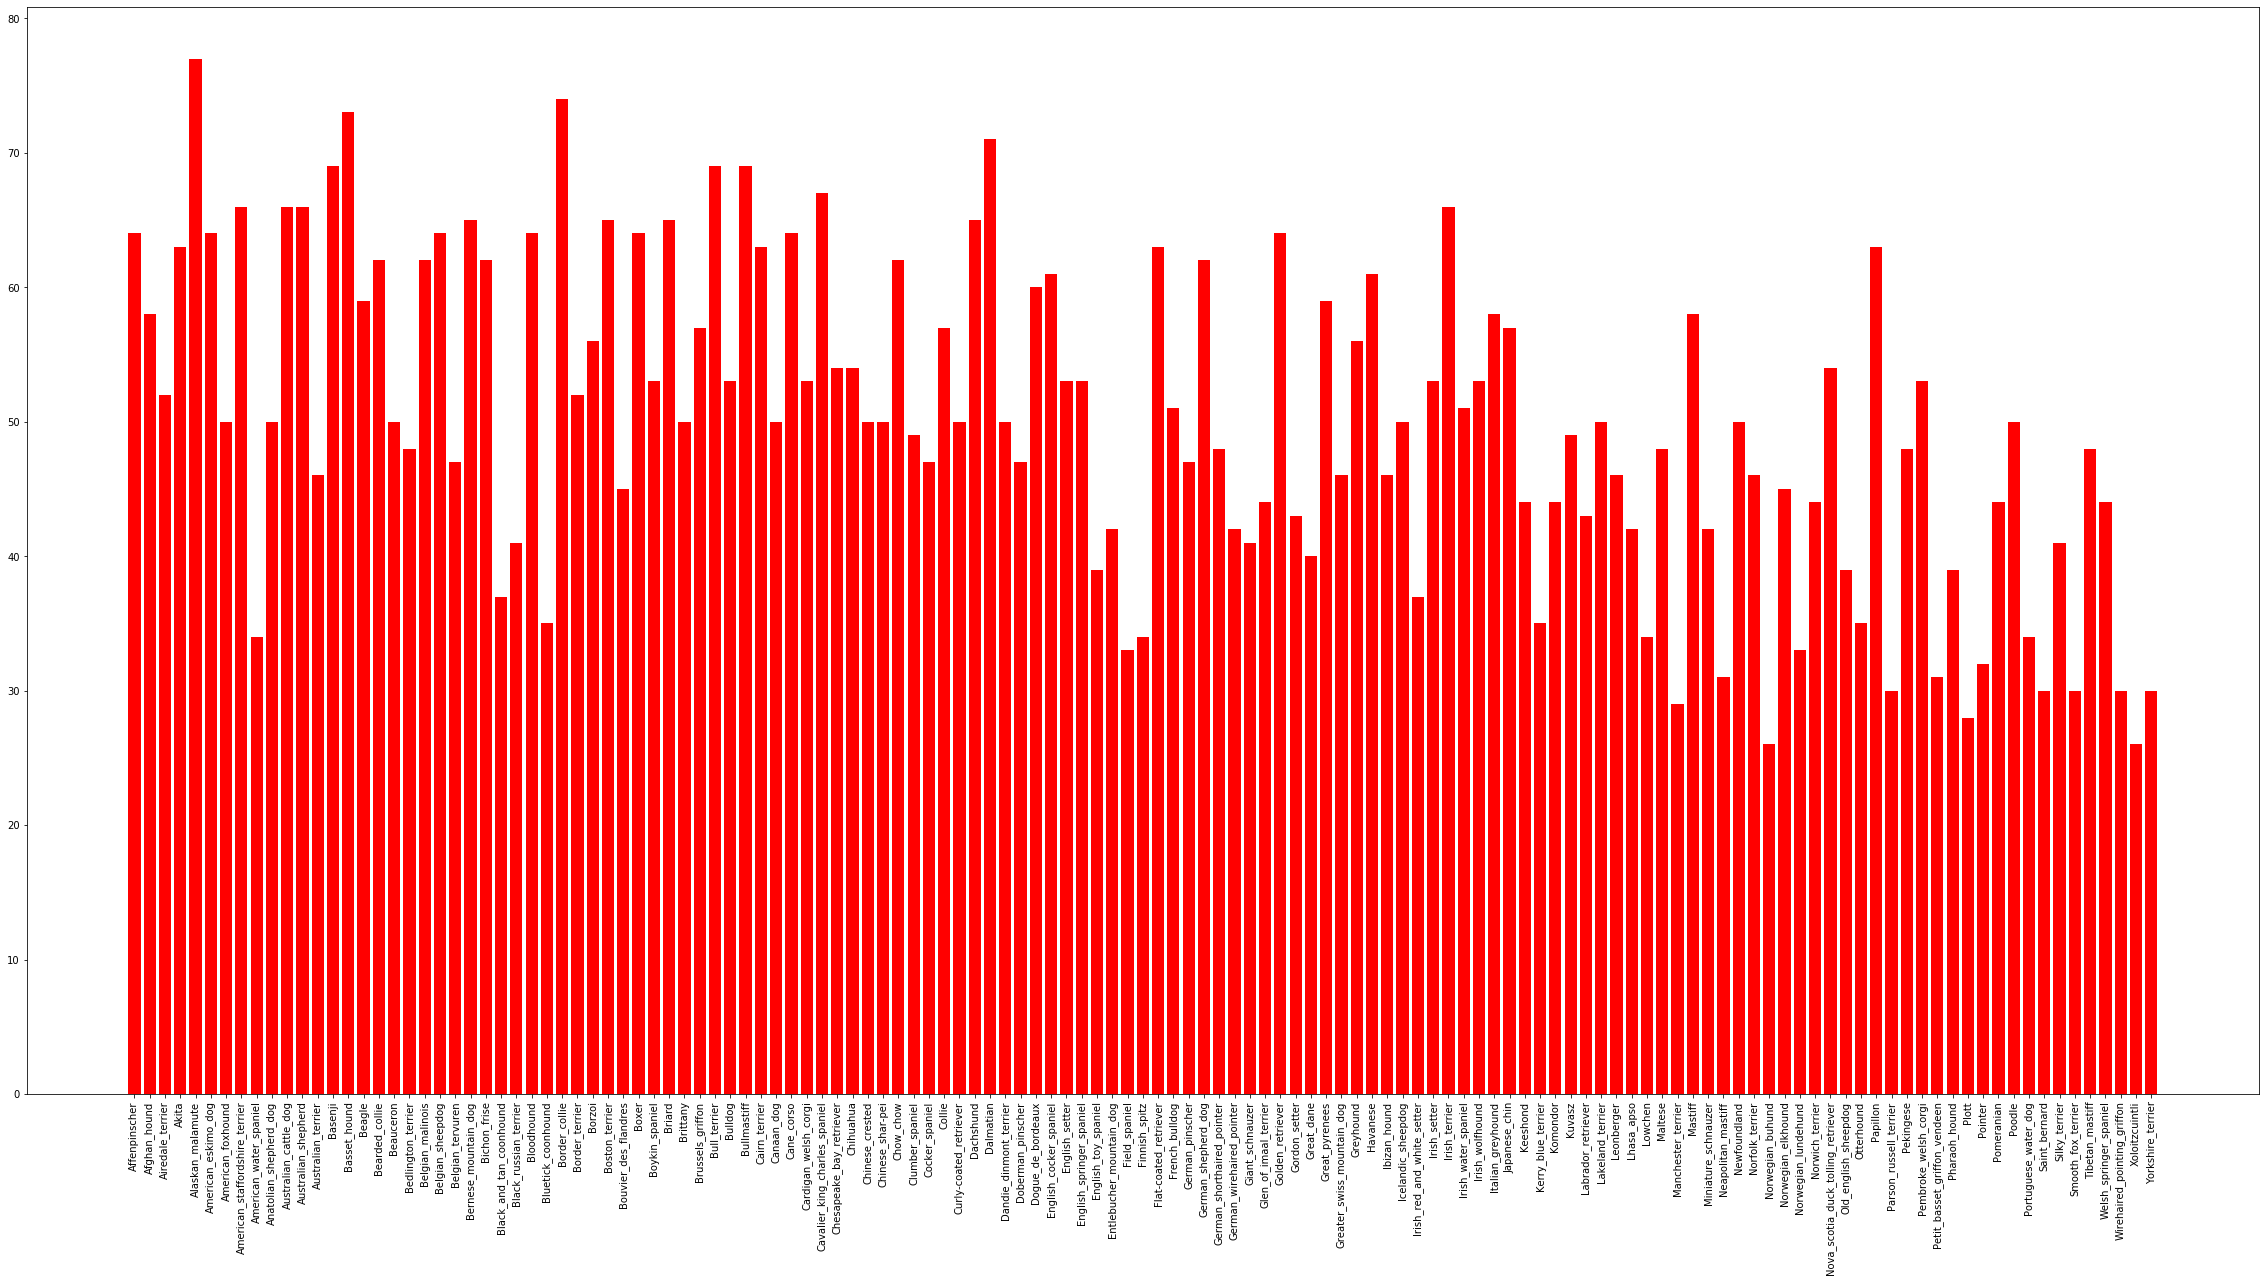

<Figure size 432x288 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize = (40, 20))
plt.xticks(rotation = 90)
plt.bar(l_names, num_files, color = 'red')
plt.show()

plt.savefig('data_balance')

Australian_cattle_dog
9


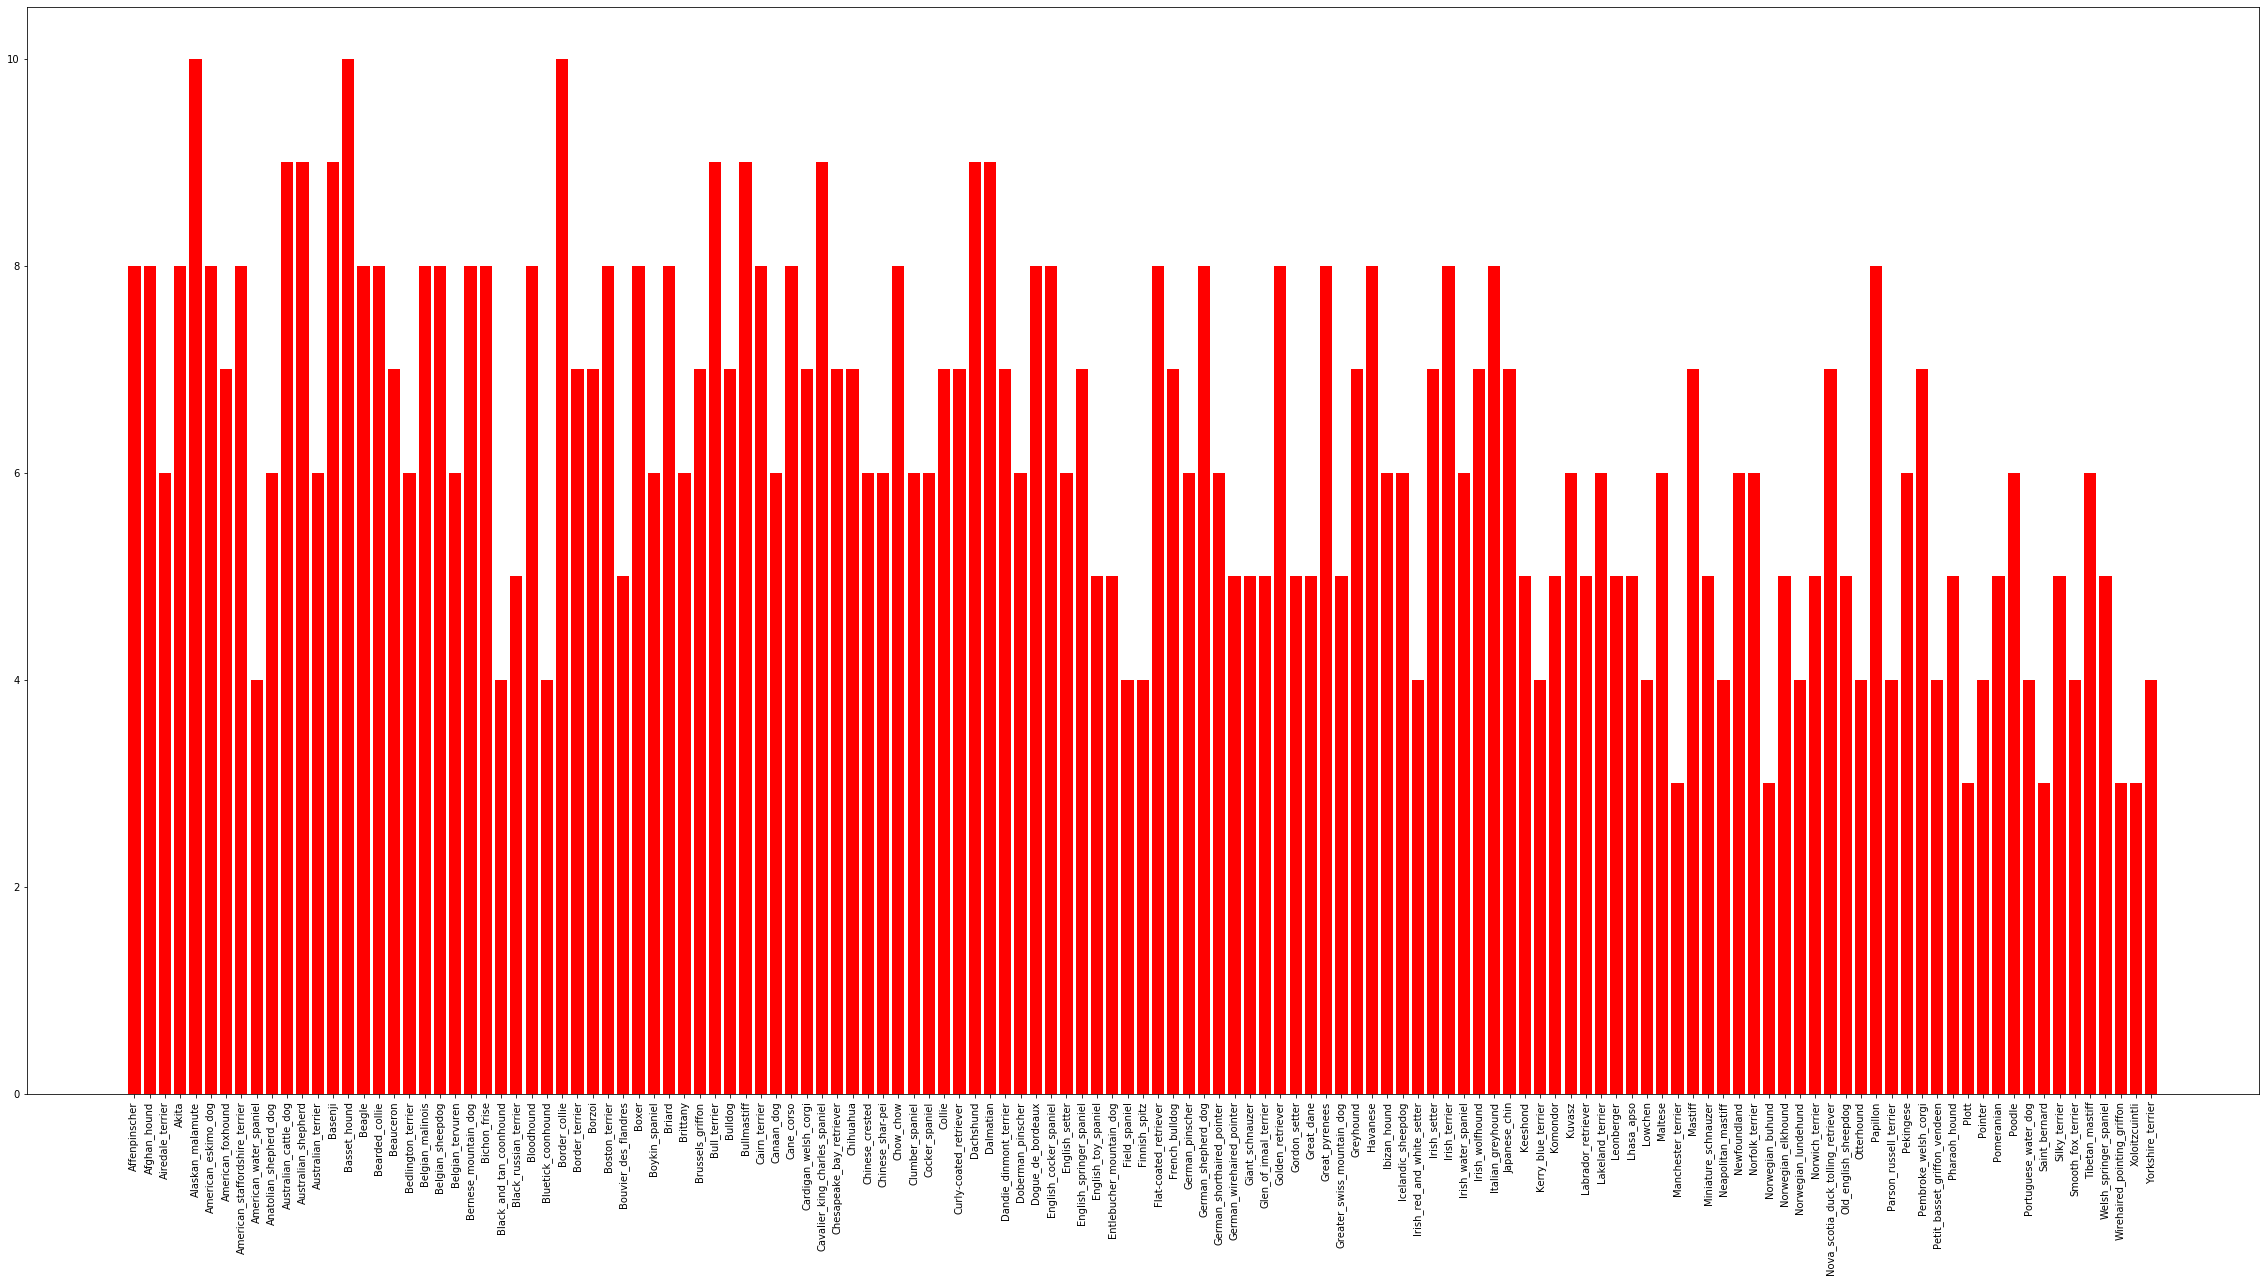

<Figure size 432x288 with 0 Axes>

In [27]:
num_files = []
l_names = []
test_dog = np.array(glob("dogImages/test/*"))
for dog, name in zip(test_dog, train_dt.classes):
    num_files.append(len(np.array(glob(dog + '/*'))))
    l_names.append(name[4:])

print(l_names[10])
print(num_files[10])

plt.figure(figsize = (40, 20))
plt.xticks(rotation = 90)
plt.bar(l_names, num_files, color = 'red')
plt.show()

plt.savefig('data_balance')

Australian_cattle_dog
8


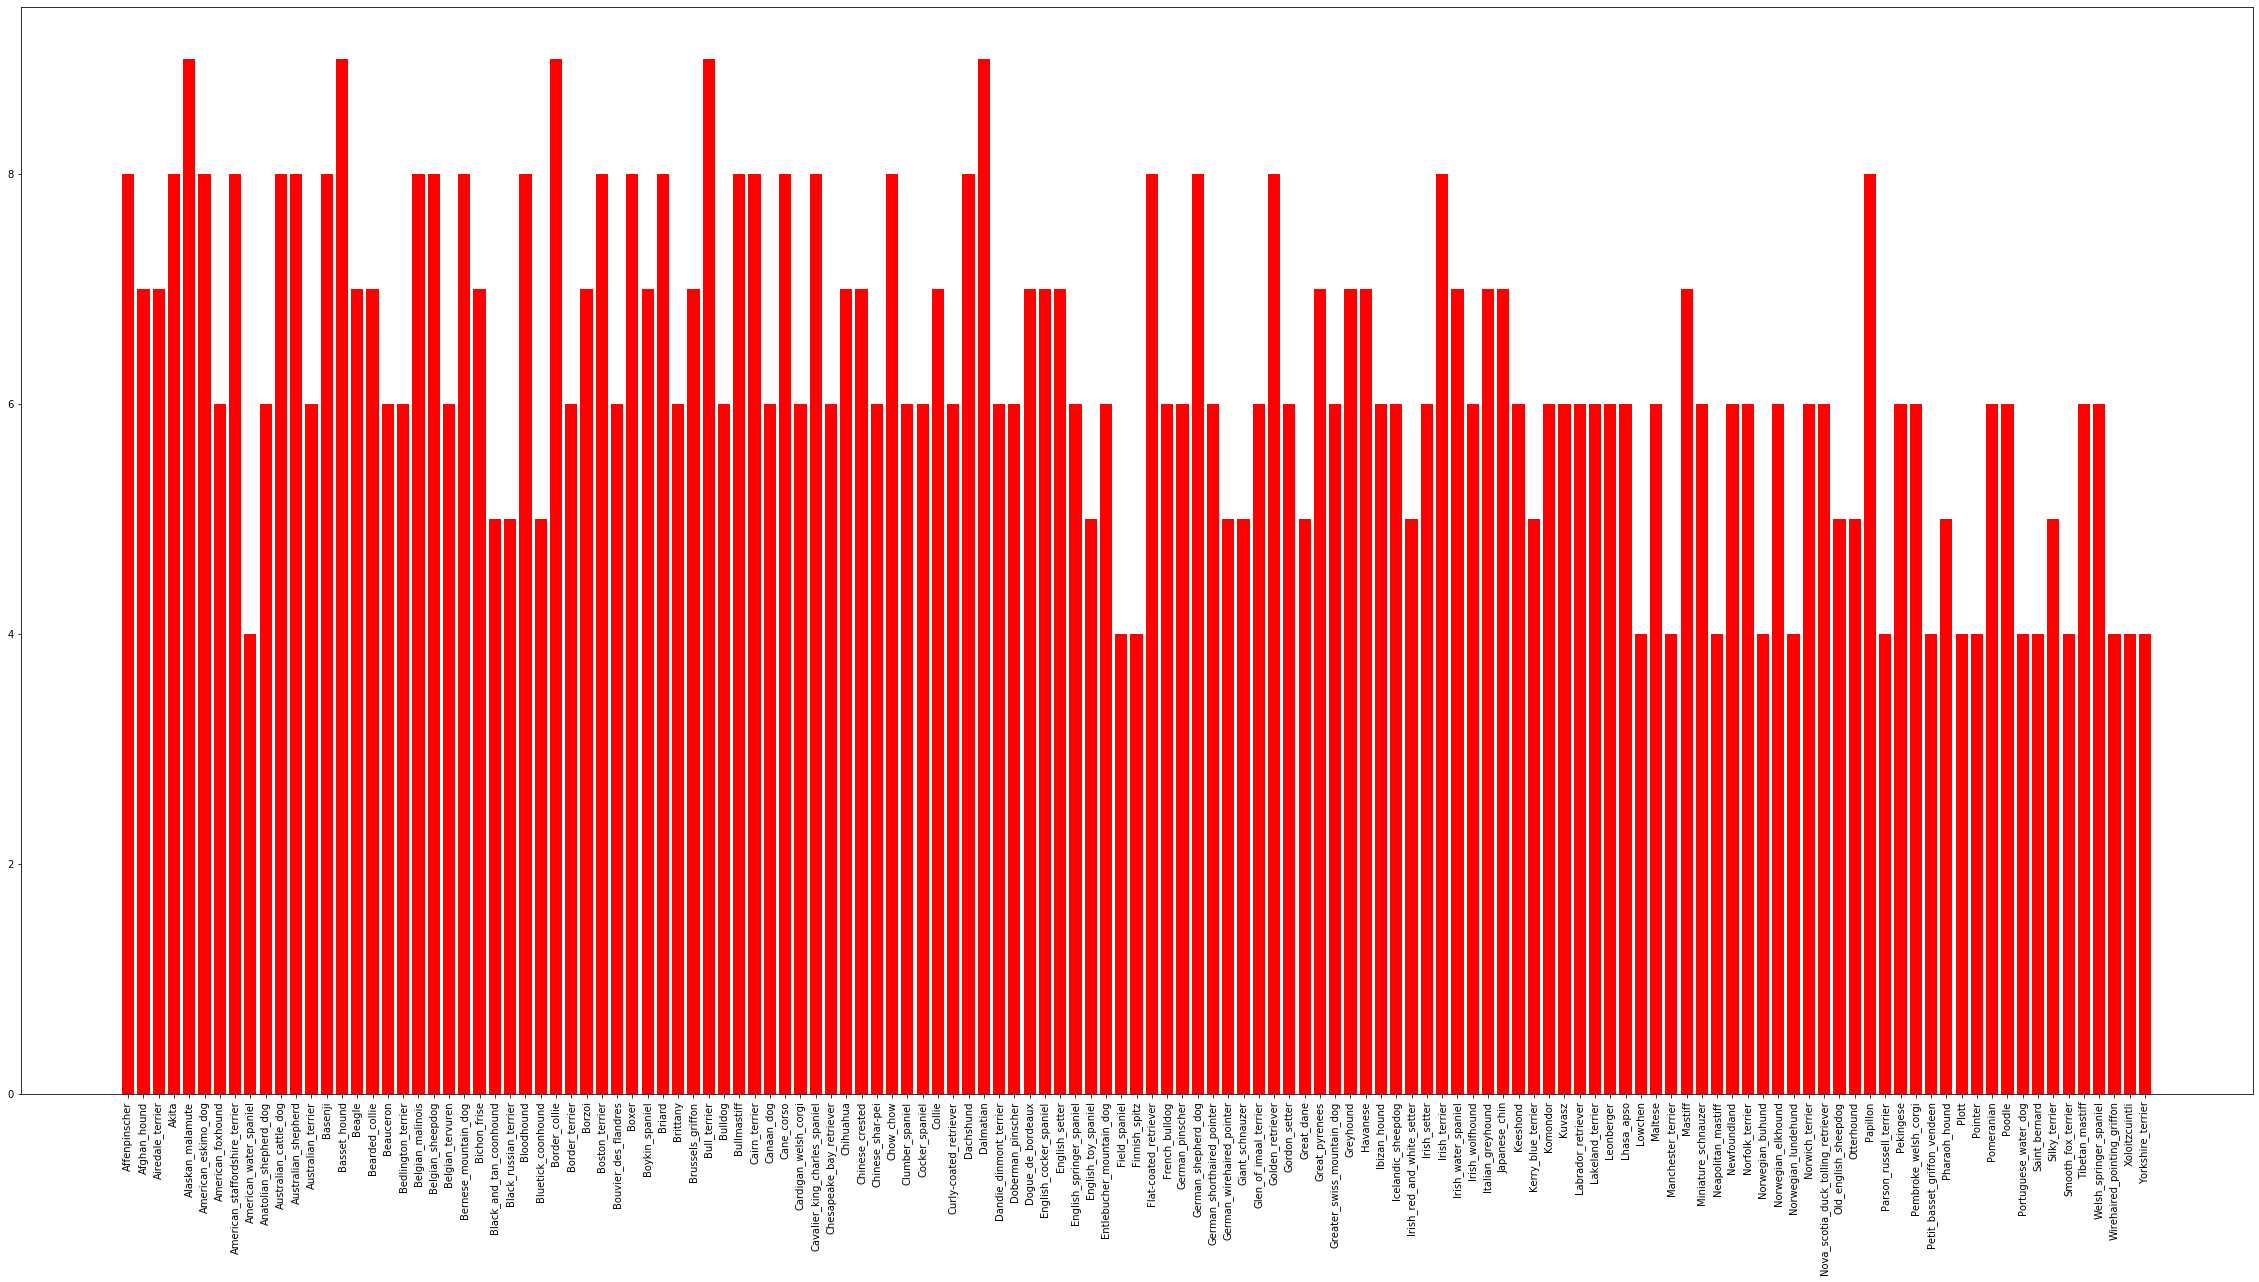

<Figure size 432x288 with 0 Axes>

In [28]:
num_files = []
l_names = []
valid_dog = np.array(glob("dogImages/valid/*"))
for dog, name in zip(valid_dog, train_dt.classes):
    num_files.append(len(np.array(glob(dog + '/*'))))
    l_names.append(name[4:])

print(l_names[10])
print(num_files[10])

plt.figure(figsize = (40, 20))
plt.xticks(rotation = 90)
plt.bar(l_names, num_files, color = 'red')
plt.show()

plt.savefig('data_balance')

Text(0, 0.5, 'Width (in pixels)')

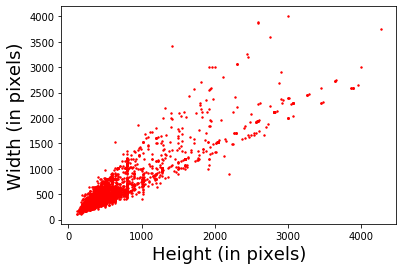

In [43]:
import cv2
from PIL import Image
from PIL import ImageFile
from tqdm import tqdm

ht=[]
wd=[]

train_dog_URL = np.array(glob("dogImages/train/*/*"))
for dog in train_dog_URL:
    img = Image.open(dog)
    height, width = img.size 
    ht.append(height)
    wd.append(width)
    
plt.scatter(ht,wd, s=2, color = 'red')
plt.xlabel('Height (in pixels)', fontsize=18)
plt.ylabel('Width (in pixels)', fontsize=18)

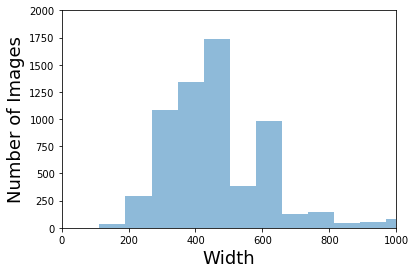

In [47]:
plt.hist(wd,bins = 50,alpha=0.5)
plt.axis([0,1000,0,2000])
plt.xlabel('Width', fontsize=18)
plt.ylabel('Number of Images', fontsize=18)
plt.show()

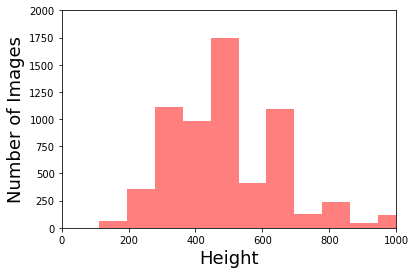

In [48]:

plt.hist(ht,bins = 50, alpha=0.5, color = 'red')
plt.axis([0,1000,0,2000])
plt.xlabel('Height', fontsize=18)
plt.ylabel('Number of Images', fontsize=18)
plt.show()

In [63]:
wd = np.array(wd)
ht = np.array(ht)
print(len(wd[(wd < 224) & (ht < 224)]))
print(len(ht[ht < 224]))
print(len(wd[wd < 224]))

45
129
94


In [71]:
import torch.nn as nn
import torch.nn.functional as F

# check if CUDA is available
use_cuda = torch.cuda.is_available()

    
# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        #Input channels = 3, output channels = 16 (224x224x3)
        self.conv1 = torch.nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        #Input channels = 16, output channels = 32 (112x112x16)
        self.conv2 = torch.nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        #Input channels = 32, output channels = 64 (56x56x32)
        self.conv3 = torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        #Input channels = 64, output channels = 128 (28x28x64) => (14x14x128)
        self.conv4 = torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)        
        
        #Max pooling 
        self.pool = nn.MaxPool2d(2, 2)
        
        #Linear layer
        self.fc1 = torch.nn.Linear(14 * 14 * 128, 1000)
        self.fc2 = torch.nn.Linear(1000, 133)
        
        #Dropout
        self.dropout = nn.Dropout(p = 0.4)
        
        #Batch norm 
        self.batch_norm = nn.BatchNorm1d(num_features=1000)
        
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        
        #Reshape data to input to the input layer of the neural net
        #Size changes from (14, 14, 128) to (1, 25088)
        #Recall that the -1 infers this dimension from the other given dimension
        
        x = x.view(-1, 14 * 14 *128)
        
        #Dropout layer
        x = self.dropout(x)
        #Hidden layer
        x = F.relu(self.batch_norm(self.fc1(x)))
        #Dropout layer
        x = self.dropout(x)
        #Hidden layer
        x = self.fc2(x)
        
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [72]:
import torch.optim as optim

learning_rate = 0.01
### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=learning_rate)

In [73]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

<All keys matched successfully>

Test Loss: 3.247653


Test Accuracy: 22% (187/836)


G:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                                    precision    recall  f1-score   support

                     Affenpinscher       0.50      0.25      0.33         8
                      Afghan hound       0.00      0.00      0.00         8
                  Airedale terrier       0.33      0.17      0.22         6
                             Akita       0.00      0.00      0.00         8
                  Alaskan malamute       0.50      0.20      0.29        10
               American eskimo dog       0.22      0.25      0.24         8
                 American foxhound       0.00      0.00      0.00         7
    American staffordshire terrier       0.33      0.12      0.18         8
            American water spaniel       0.00      0.00      0.00         4
            Anatolian shepherd dog       0.00      0.00      0.00         6
             Australian cattle dog       0.00      0.00      0.00         9
               Australian shepherd       0.50      0.33      0.40         9
           

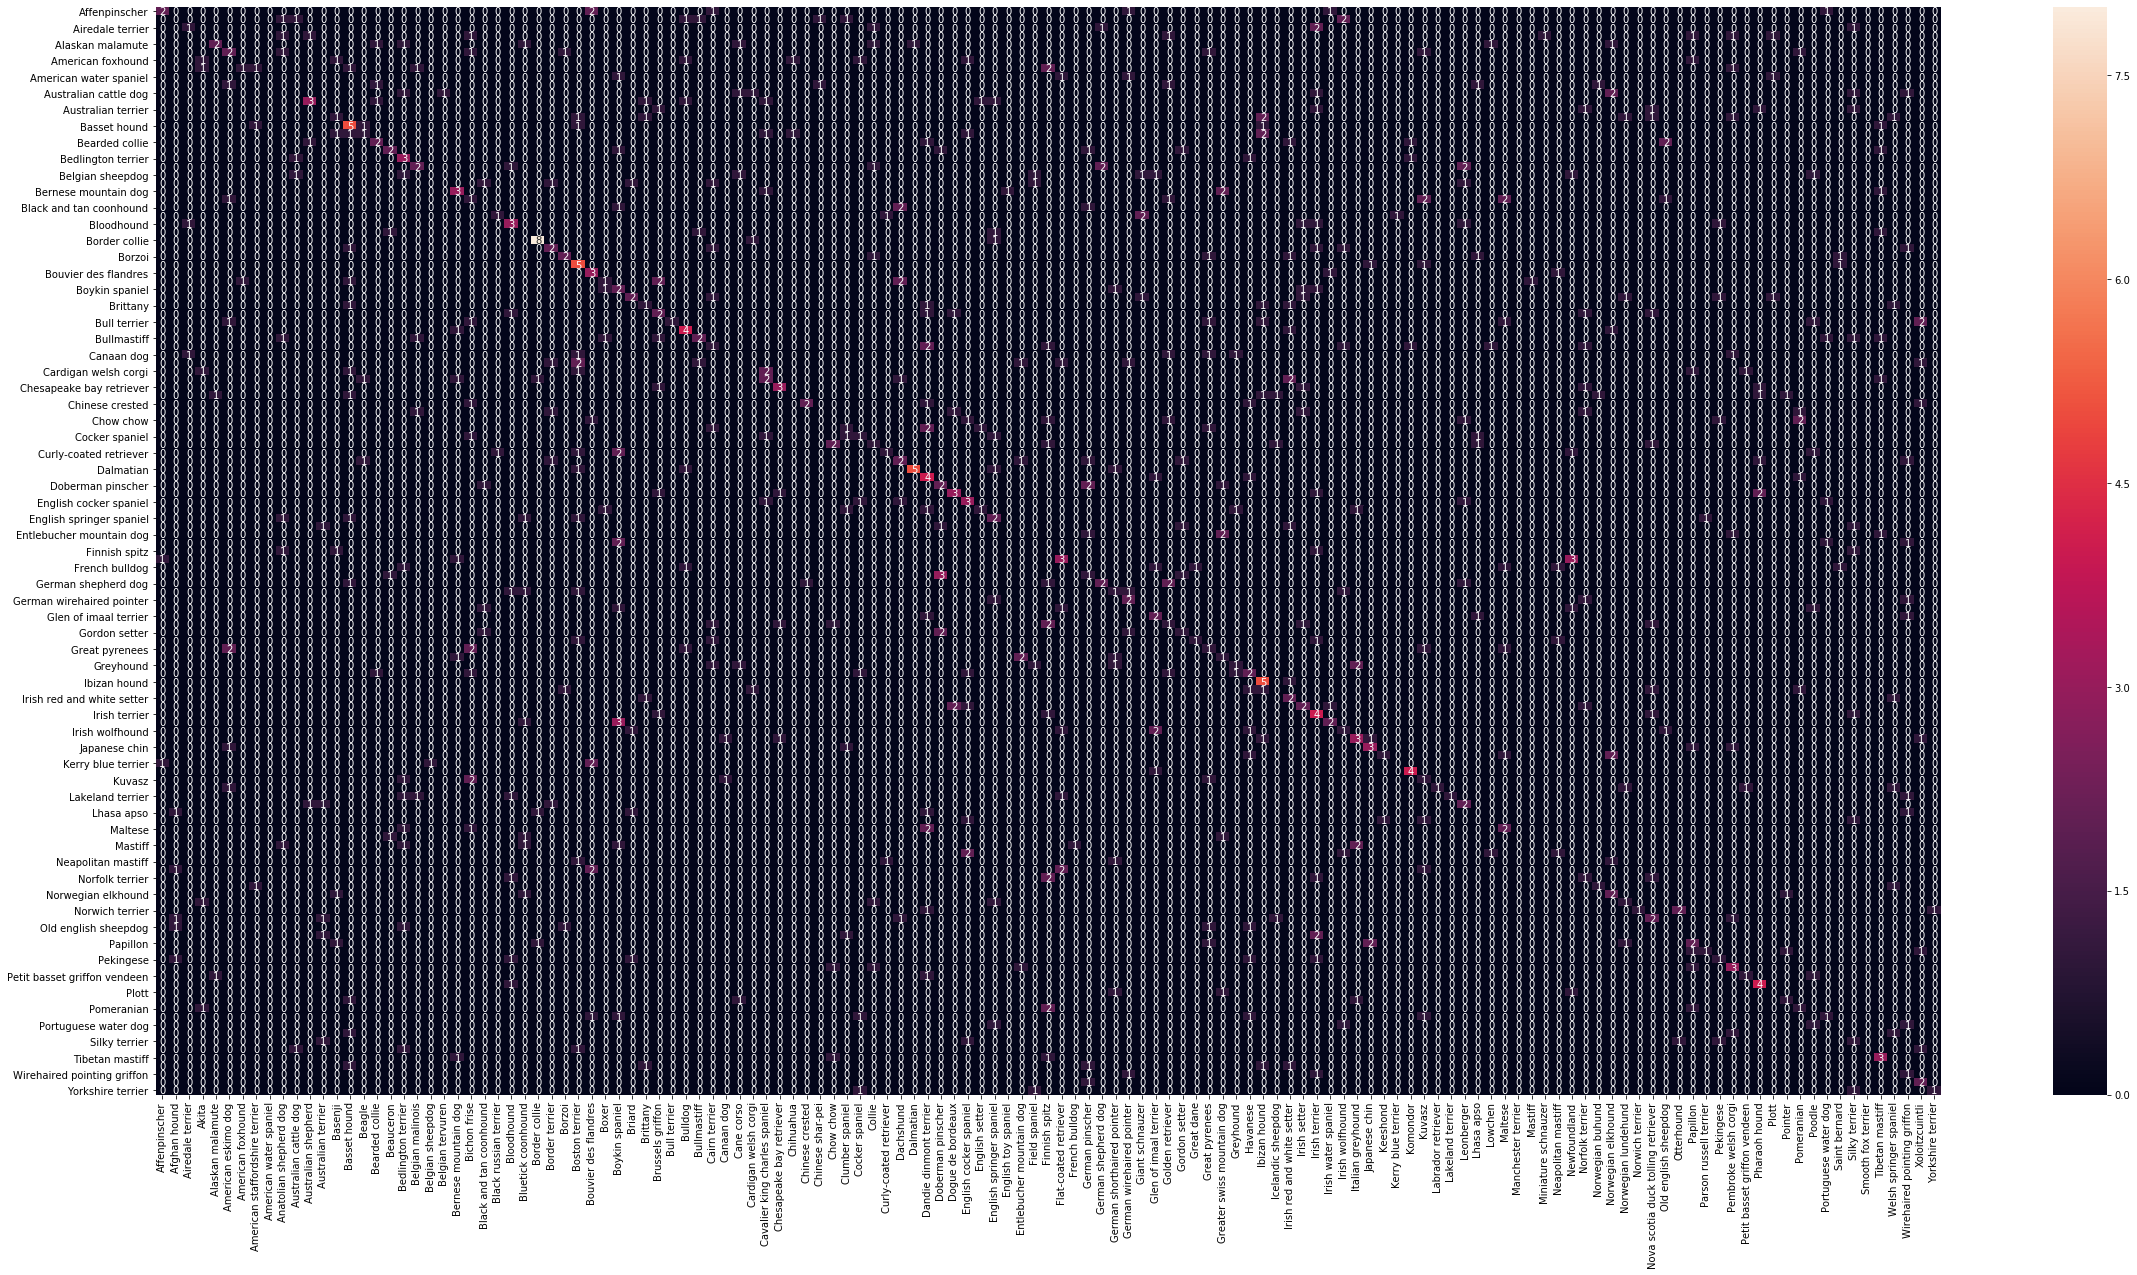

In [81]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

class_names = [item[4:].replace("_", " ") for item in train_dt.classes]


def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.
    y_true = np.array([])
    y_pred = np.array([])
    
    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
        
        y_pred = np.append(y_pred, pred.cpu().numpy())
        y_true = np.append(y_true, target.cpu().numpy())
        
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
    
    print(classification_report(y_true, y_pred, target_names=class_names))
    df_cm = pd.DataFrame(confusion_matrix(y_true, y_pred), index = [i for i in class_names],
                  columns = [i for i in class_names])
    plt.figure(figsize = (40,20))
    sn.heatmap(df_cm, annot=True)
    
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)


In [82]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch

In [83]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.wide_resnet50_2(pretrained=True)

In [84]:
print(model_transfer)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), strid

)


In [85]:
for param in model_transfer.parameters():
    param.requires_grad = False

model_transfer.fc = torch.nn.Linear(2048, 133, bias = True)

if use_cuda:
    model_transfer = model_transfer.cuda()

In [86]:
learning_rate = 0.01
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.parameters(), lr=learning_rate)

In [87]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

<All keys matched successfully>

Test Loss: 0.705896


Test Accuracy: 83% (695/836)
                                    precision    recall  f1-score   support

                     Affenpinscher       0.86      0.75      0.80         8
                      Afghan hound       1.00      0.88      0.93         8
                  Airedale terrier       0.86      1.00      0.92         6
                             Akita       1.00      0.75      0.86         8
                  Alaskan malamute       0.83      1.00      0.91        10
               American eskimo dog       1.00      0.88      0.93         8
                 American foxhound       0.70      1.00      0.82         7
    American staffordshire terrier       0.80      1.00      0.89         8
            American water spaniel       1.00      0.50      0.67         4
            Anatolian shepherd dog       0.80      0.67      0.73         6
             Australian cattle dog       0.88      0.78      0.82         9
               Australian shepherd  

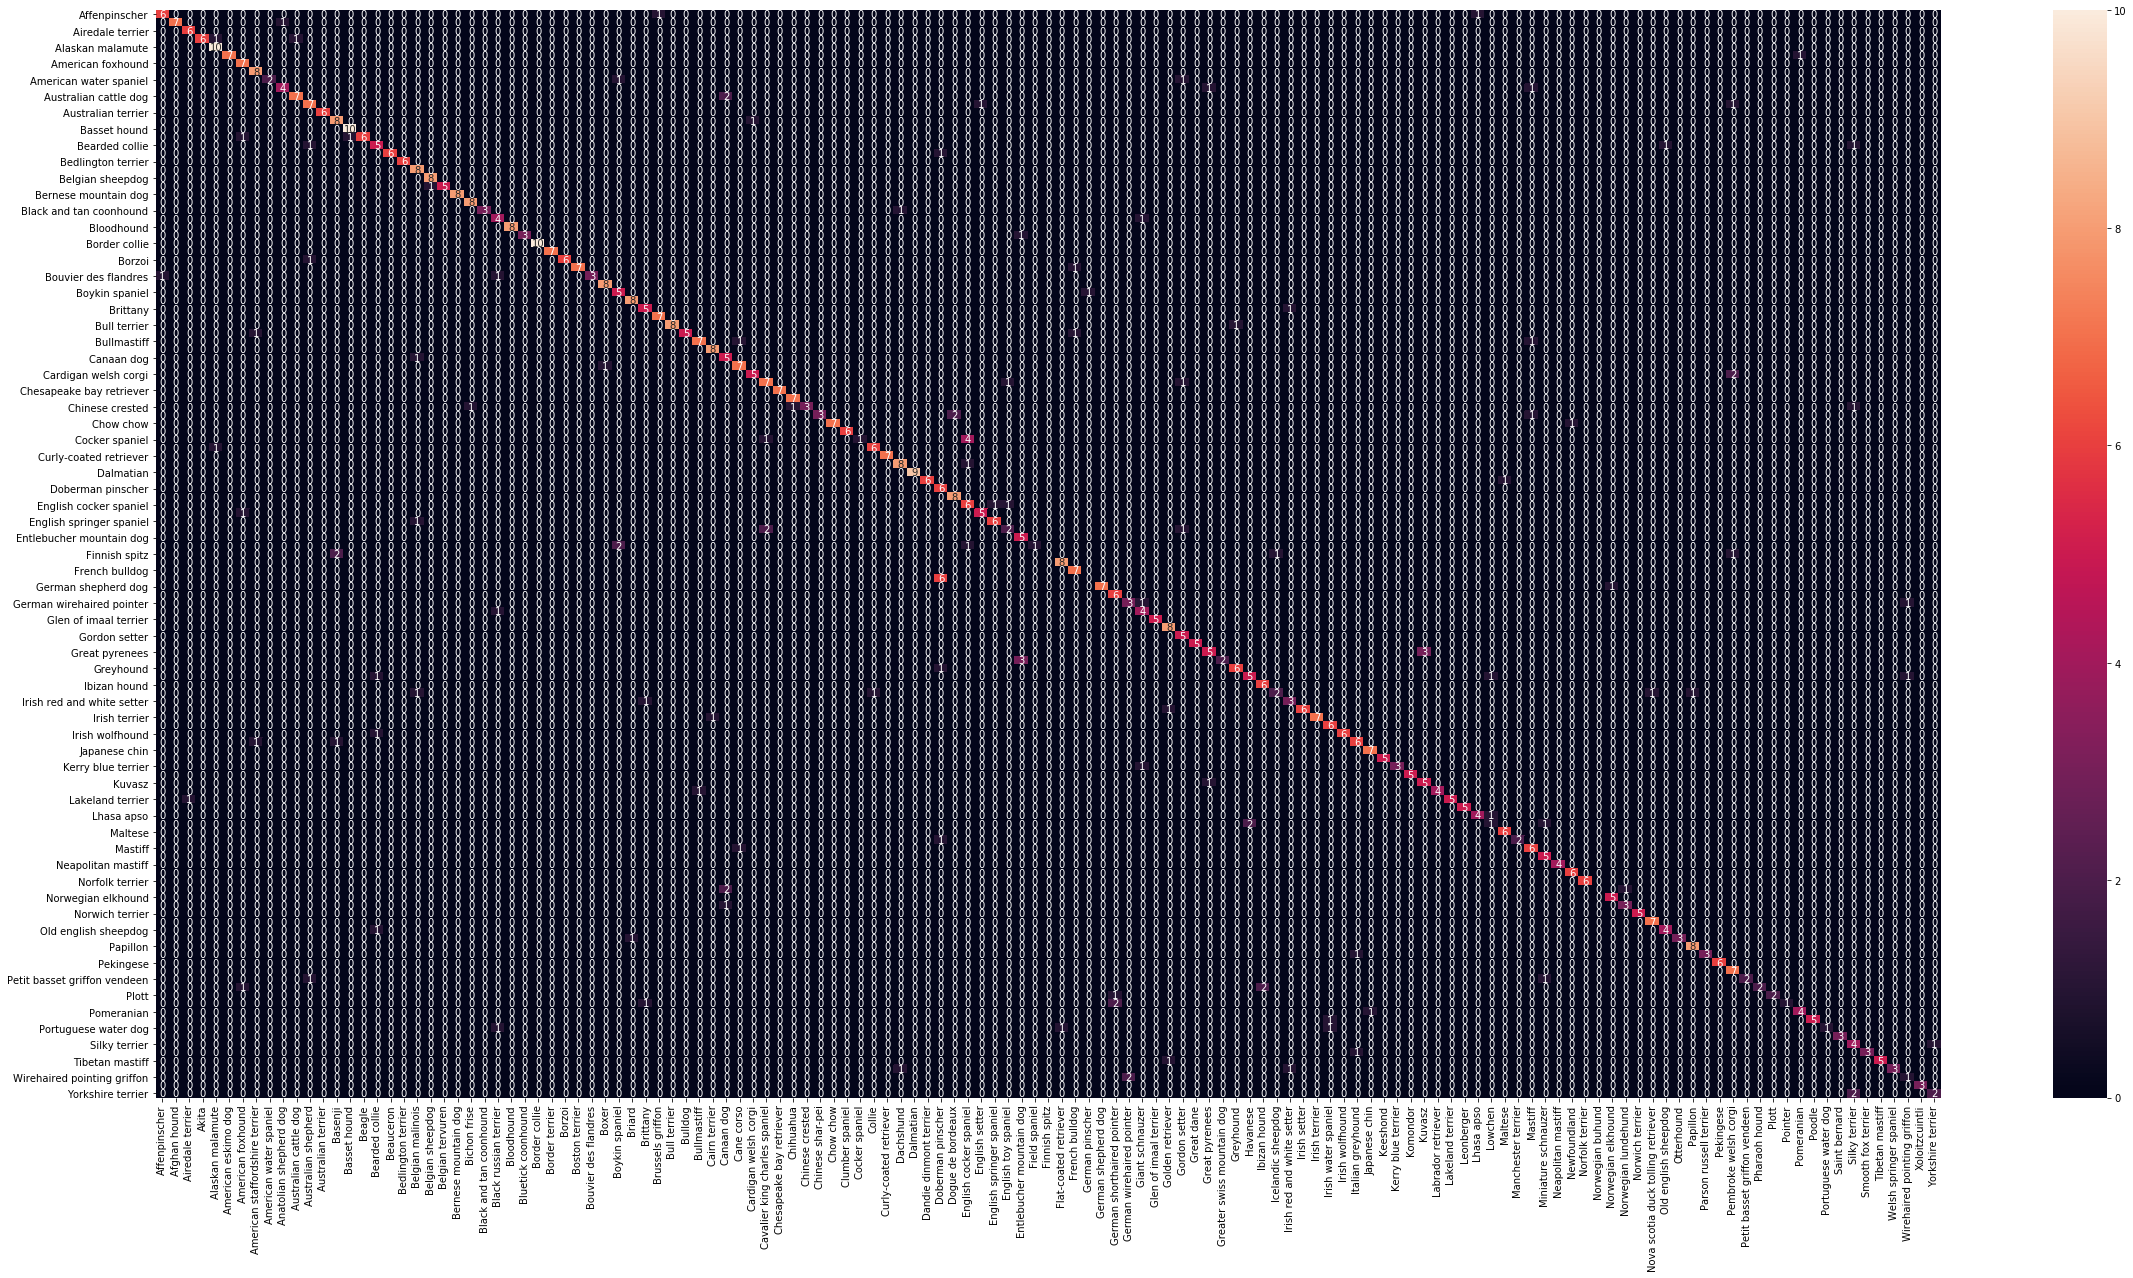

In [88]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)